In [74]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
from folium import plugins
from folium.features import CustomIcon
import googlemaps
import json
import pickle
import warnings

font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
warnings.filterwarnings(action='ignore')

## BMW 쇼룸&서비스센터 신규 매장 입지 선정을 위한 분석 report ##


index


1. BMW 임포터 & 딜러사 동향
    1) 임포터
       - 수입자동차 판매 추이
       - BMW 연월간 판매 추이
       - BMW Vs Benz 연월간 판매추이
       - BMW 모델 별 판매량 추이
         막대그래프 / 파이 차트  
       - BMW SUV Vs Sedan 연간 판매 추이 비교
         파이 차트 / 라인 그래프
       - 연간 차량 등록 수 및 BMW SUV 판매추이 비교
       - 경쟁사 거점 분포
    2) 딜러사
       - 딜러사 거점 분포
       - 딜러사 거점 점유율

2. 전시장 & 서비스센터 신규 거점 분석
     1) 서울시 타겟 고객층 분석  
       - 인구통계 분석
         인구 히트맵 / 성비 그래프 / 인구 밀집도
       - 차량 등록 수
         막대그래프 / 지도
       - 차대차 교통사고 수 구별 분석
         지도
     2) 서울시 입지 비용 분석
       - 아파트/오피스텔 월세
         박스 그래프
       - 상권별 중대형 상가 월세(원/㎡)
         막대 그래프 / 지도
      


In [2]:
df = pd.read_csv('C:\\Users\\웍스컴바인\\Desktop\\work\\data_analysis\\DanawaCrawler\\crawl_result\\europe6_model_year/06. 2017~2021(1~5월)_6브랜드_모델_연도별_판매량.csv', encoding='utf-8')
df
# 2017

,Unnamed: 0,brand,year,car_name,sub_name,quentity
0,0,BMW,2017,5 Series,520d,"10,249"
1,1,BMW,2017,5 Series,520d xDrive,"5,712"
2,2,BMW,2017,5 Series,530i xDrive,"4,690"
3,3,BMW,2017,5 Series,530i,"4,560"
4,4,BMW,2017,5 Series,530d,569
...,...,...,...,...,...,...
1710,150,Volvo,2021,V90 Cross Country,B5 AWD,205
1711,151,Volvo,2021,V90 Cross Country,B6 AWD,7
1712,152,Volvo,2021,V90 Cross Country,B6 AWD,7
1713,153,Volvo,2021,S90,2.0 T8 AWD,53


In [3]:
df = df[['brand', 'year', 'car_name', 'sub_name', 'quentity']]
df

,brand,year,car_name,sub_name,quentity
0,BMW,2017,5 Series,520d,"10,249"
1,BMW,2017,5 Series,520d xDrive,"5,712"
2,BMW,2017,5 Series,530i xDrive,"4,690"
3,BMW,2017,5 Series,530i,"4,560"
4,BMW,2017,5 Series,530d,569
...,...,...,...,...,...
1710,Volvo,2021,V90 Cross Country,B5 AWD,205
1711,Volvo,2021,V90 Cross Country,B6 AWD,7
1712,Volvo,2021,V90 Cross Country,B6 AWD,7
1713,Volvo,2021,S90,2.0 T8 AWD,53


In [5]:
# quentity 문자열로 정수 변환x. 콤마제거하면서 정수변환하기
df['quentity'] = df.quentity.str.replace(',', '').astype('int64')

In [15]:
MB = df.loc[df['brand'] == 'MB']#MB

In [16]:
MB_quentity = MB.groupby(['year'])[['quentity']].sum()
MB_quentity

,quentity
year,
2017,77873
2018,80525
2019,86924
2020,81349
2021,37022


In [17]:
BMW = df.loc[df['brand'] == 'BMW']#BMW

In [18]:
# BMW SUV 모델 연간 판매량 증가 추이

BMWYear = BMW.groupby(['year','car_name'])[['quentity']].sum()
BMWYear 

quentity
year car_name                        
2017 1 Series                    7726
     2 Series Active Tourer      1900
     3 Series                   12608
     4 Series                    2723
     5 Series                   26892
...                               ...
2021 X6                          1793
     X6 M                         132
     X7                          1701
     Z4                           226
     i3                           130

[120 rows x 1 columns]

In [19]:
BMWYear = BMWYear.reset_index()

In [20]:
# sedan
BMWSedanYear = BMWYear[BMWYear['car_name'].isin(['5 Series','3 Series','1 Series','7 Series','6 Series','4 Series','2 Series Active Tourer','Gran Turismo','M','2 Series'
,'M5','Z4','M2','8 Series','New 4 Series','M4','i8','M3','M8','The new M3','The new M4 '])]
BMWSedanYear

,year,car_name,quentity
0,2017,1 Series,7726
1,2017,2 Series Active Tourer,1900
2,2017,3 Series,12608
3,2017,4 Series,2723
4,2017,5 Series,26892
...,...,...,...
102,2021,M5,150
103,2021,M8,18
104,2021,New 4 Series,537
105,2021,The new M3,72


In [21]:
BMWSedanYearQuentity = BMWSedanYear.groupby(['year'])[['quentity']].sum()
BMWSedanYearQuentity

,quentity
year,
2017,59492
2018,48226
2019,39470
2020,42709
2021,20711


In [24]:
BMWSedanYearQuentity = BMWSedanYearQuentity.reset_index()
BMWSedanYearQuentity

,index,year,quentity
0,0,2017,59492
1,1,2018,48226
2,2,2019,39470
3,3,2020,42709
4,4,2021,20711


In [25]:
BMWSedanYearQuentity = BMWSedanYearQuentity.drop(['index'], axis=1)

In [26]:
# suv 특정 행값만 가져오기
BMWSuvYear = BMWYear[BMWYear['car_name'].isin(['X5', 'X3', 'X4', 'X6', 'X1', 'X7', 'X2', 'i3', 'X3 M', 'X4 M', 'X5 M', 'X6 M'])]
BMWSuvYear

,year,car_name,quentity
9,2017,X1,1530
10,2017,X3,1917
11,2017,X4,2854
12,2017,X5,3343
13,2017,X6,2607
15,2017,i3,386
30,2018,X1,842
31,2018,X2,108
32,2018,X3,2701
33,2018,X4,1156


In [27]:
BMWSuvYearQuentity = BMWSuvYear.groupby(['year','car_name'])[['quentity']].sum()
BMWSuvYearQuentity

quentity
year car_name          
2017 X1            1530
     X3            1917
     X4            2854
     X5            3343
     X6            2607
     i3             386
2018 X1             842
     X2             108
     X3            2701
     X4            1156
     X5            1959
     X6            1775
     i3             382
2019 X1            1509
     X2             765
     X3            2407
     X3 M           112
     X4            1786
     X4 M           106
     X5            2461
     X6            1087
     X7             522
     i3             508
2020 X1            1591
     X2             547
     X3            3688
     X3 M           294
     X4            3732
     X4 M           310
     X5            3638
     X5 M            86
     X6            2645
     X6 M           160
     X7            2783
     i3             304
2021 X1            1417
     X2             322
     X3            2048
     X3 M           100
     X4            1433
     X4 M            78
     X5            2326
     X5 M            88
     X6            1793
     X6 M           132
     X7            1701
     i3             130

In [28]:
# 두개의 그룹의 경우 피봇테이블로 변환

BMWSuvYearQuentity = BMWSuvYearQuentity.reset_index()
BMWSuvYearQuentity_pivot = BMWSuvYearQuentity.pivot(index='year',columns='car_name', values='quentity')

In [29]:
BMWSuvYearQuentity_pivot

car_name,X1,X2,X3,X3 M,X4,X4 M,X5,X5 M,X6,X6 M,X7,i3
year,,,,,,,,,,,,
2017,1530.0,NaN,1917.0,NaN,2854.0,NaN,3343.0,NaN,2607.0,NaN,NaN,386.0
2018,842.0,108.0,2701.0,NaN,1156.0,NaN,1959.0,NaN,1775.0,NaN,NaN,382.0
2019,1509.0,765.0,2407.0,112.0,1786.0,106.0,2461.0,NaN,1087.0,NaN,522.0,508.0
2020,1591.0,547.0,3688.0,294.0,3732.0,310.0,3638.0,86.0,2645.0,160.0,2783.0,304.0
2021,1417.0,322.0,2048.0,100.0,1433.0,78.0,2326.0,88.0,1793.0,132.0,1701.0,130.0


In [30]:
BMWSuvYearQuentity2 = BMWSuvYear.groupby(['year'])[['quentity']].sum()
BMWSuvYearQuentity2

,quentity
year,
2017,12637
2018,8923
2019,11263
2020,19778
2021,11568


In [31]:
BMWSuvYearQuentity2 = BMWSuvYearQuentity2.reset_index()
BMWSuvYearQuentity2

,year,quentity
0,2017,12637
1,2018,8923
2,2019,11263
3,2020,19778
4,2021,11568


In [32]:
BMWSuvSedanYear = pd.merge(BMWSedanYearQuentity, BMWSuvYearQuentity2, how = 'outer', on='year')
BMWSuvSedanYear               

,year,quentity_x,quentity_y
0,2017,59492,12637
1,2018,48226,8923
2,2019,39470,11263
3,2020,42709,19778
4,2021,20711,11568


In [72]:
BMWSuvSedanYear.columns = ['year', 'BMW_Sedan', 'BMW_SUV']
BMWSuvSedanYear

,year,BMW_Sedan,BMW_SUV
0,2017,59492,12637
1,2018,48226,8923
2,2019,39470,11263
3,2020,42709,19778
4,2021,20711,11568


In [34]:
# 2017~2021(1월~5월)총 누적 판매 순위
all_BMW_model_quentity = BMW.groupby(['car_name'])[['quentity']].sum()
all_BMW_model_quentity

,quentity
car_name,
1 Series,18338
2 Series,1294
2 Series Active Tourer,7002
3 Series,42392
4 Series,8030
5 Series,101035
6 Series,10243
7 Series,11762
8 Series,633


In [35]:
all_BMW_model_quentity = all_BMW_model_quentity.reset_index()

In [36]:
BMW_quentity = BMW.groupby(['year'])[['quentity']].sum()
BMW_quentity

,quentity
year,
2017,72129
2018,57149
2019,50733
2020,62487
2021,32337


In [44]:
BMWSalesRanking = all_BMW_model_quentity.sort_values('quentity', ascending=False)
BMWSalesRanking

,car_name,quentity
5,5 Series,101035
3,3 Series,42392
0,1 Series,18338
25,X5,13727
21,X3,12761
7,7 Series,11762
23,X4,10961
6,6 Series,10243
27,X6,9907
4,4 Series,8030


In [46]:
BMWSalesRanking.columns = ['BMW모델','판매량']#컬럼 변경

In [47]:
BMWSalesRanking['점유율'] = BMWSalesRanking['판매량']/274835*100
BMWSalesRanking
#점유율칼럼추가

,BMW모델,판매량,점유율
5,5 Series,101035,36.762057
3,3 Series,42392,15.424527
0,1 Series,18338,6.672367
25,X5,13727,4.994633
21,X3,12761,4.643150
7,7 Series,11762,4.279659
23,X4,10961,3.988211
6,6 Series,10243,3.726963
27,X6,9907,3.604708
4,4 Series,8030,2.921753


In [48]:
BMWSuv = BMWSalesRanking.loc[[25,21,23,27,19,29,20,31,22,24,28,26], :]
BMWSuv
# SUV 차량 점유율

,BMW모델,판매량,점유율
25,X5,13727,4.994633
21,X3,12761,4.643150
23,X4,10961,3.988211
27,X6,9907,3.604708
19,X1,6889,2.506595
29,X7,5006,1.821457
20,X2,1742,0.633835
31,i3,1710,0.622191
22,X3 M,506,0.184110
24,X4 M,494,0.179744


In [49]:
BMWSuvSum = BMWSuv['판매량'].sum()
BMWSuvSum

64169

In [50]:
BMWSuvSum = pd.DataFrame({'BMW':['SUV'], '판매량':[64169]})
BMWSuvSum

,BMW,판매량
0,SUV,64169


In [51]:
BMWSedan = BMWSalesRanking.loc[[5,3,0,7,6,4,2,9,10,1,14,30,11,8,16,13,32,12,15,17,18], :]
BMWSedan

,BMW모델,판매량,점유율
5,5 Series,101035,36.762057
3,3 Series,42392,15.424527
0,1 Series,18338,6.672367
7,7 Series,11762,4.279659
6,6 Series,10243,3.726963
4,4 Series,8030,2.921753
2,2 Series Active Tourer,7002,2.547710
9,Gran Turismo,2934,1.067550
10,M,1571,0.571616
1,2 Series,1294,0.470828


In [52]:
BMWSedanSum = BMWSedan['판매량'].sum()
BMWSedanSum

210666

In [53]:
BMWSedanSum = pd.DataFrame({'BMW':['Sedan'], '판매량':[210666]})
BMWSedanSum

,BMW,판매량
0,Sedan,210666


In [54]:
# 데이터프레임 합치기
BMWModel = pd.concat([BMWSuvSum, BMWSedanSum])
BMWModel                     

,BMW,판매량
0,SUV,64169
0,Sedan,210666


<AxesSubplot:title={'center':'2017-2021(1-5월) BMW 모델 별 판매량 순위'}, xlabel='판매량', ylabel='BMW모델'>

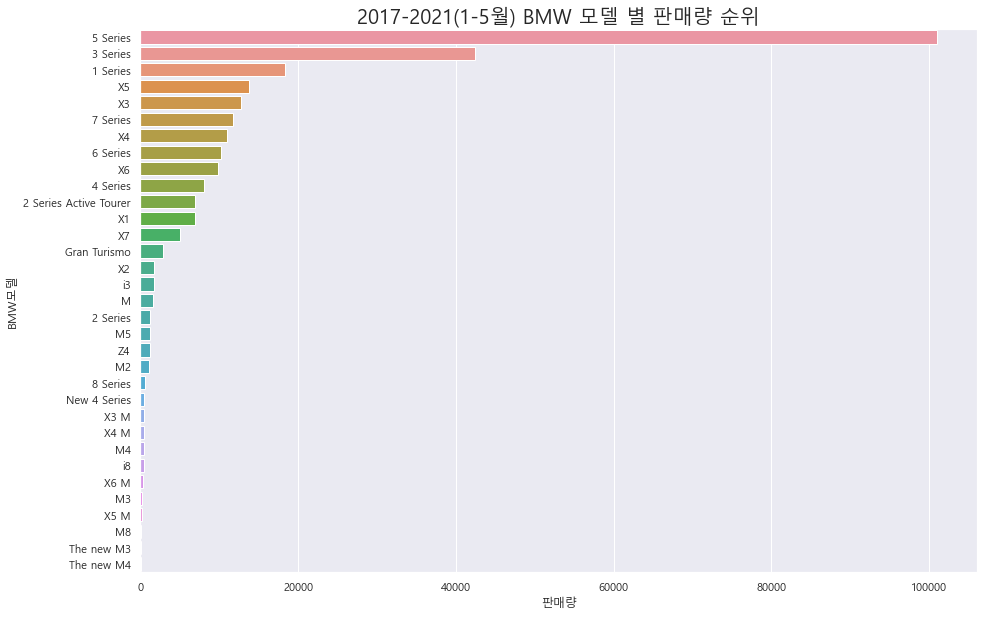

In [55]:
# seaborn 의 set 기능을 통해 폰트 설정
# "Malgun Gothic"
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

plt.figure(figsize=(15,10)) # size
plt.title('2017-2021(1-5월) BMW 모델 별 판매량 순위', size= 20)
plt.grid(True) #눈금
plt.rotation=45
sns.barplot(x="판매량", y="BMW모델", data=BMWSalesRanking)

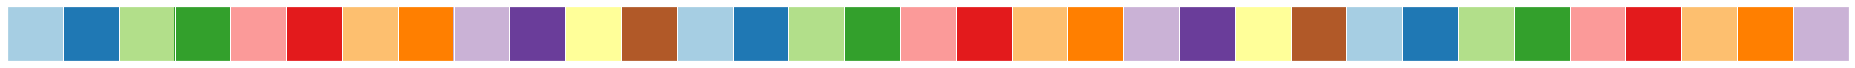

In [56]:
# color palette 설정
custom_palette = sns.color_palette("Paired", 33)
sns.palplot(custom_palette)

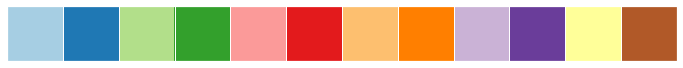

In [57]:
# color palette 설정
custom_palette2 = sns.color_palette("Paired", 12)
sns.palplot(custom_palette2)

In [58]:
# labels = ['5 Series','3 Series','1 Series','X5','X3','7 Series','X4','6 Series','X6','4 Series'
#         '2 Series Active Tourer','X1','X7','Gran Turismo','X2','i3','M','2 Series','M5','Z4'
#         ,'M2','8 Series','New 4 Series','X3 M','X4 M','M4','i8','X6 M','M3','X5 M',
#         'M8','The new M3','The new M4']

In [64]:
car_registration = pd.read_excel("C:\\Users\\웍스컴바인\\Desktop\\work\\data_analysis\\bmwAnalysis\\data/2021승용_승합_등록현황3.xlsx")
car_registration

,year,자가용총대수
0,2017,3.1
1,2018,2.6
2,2019,1.7
3,2020,2.8
4,2021,1.1


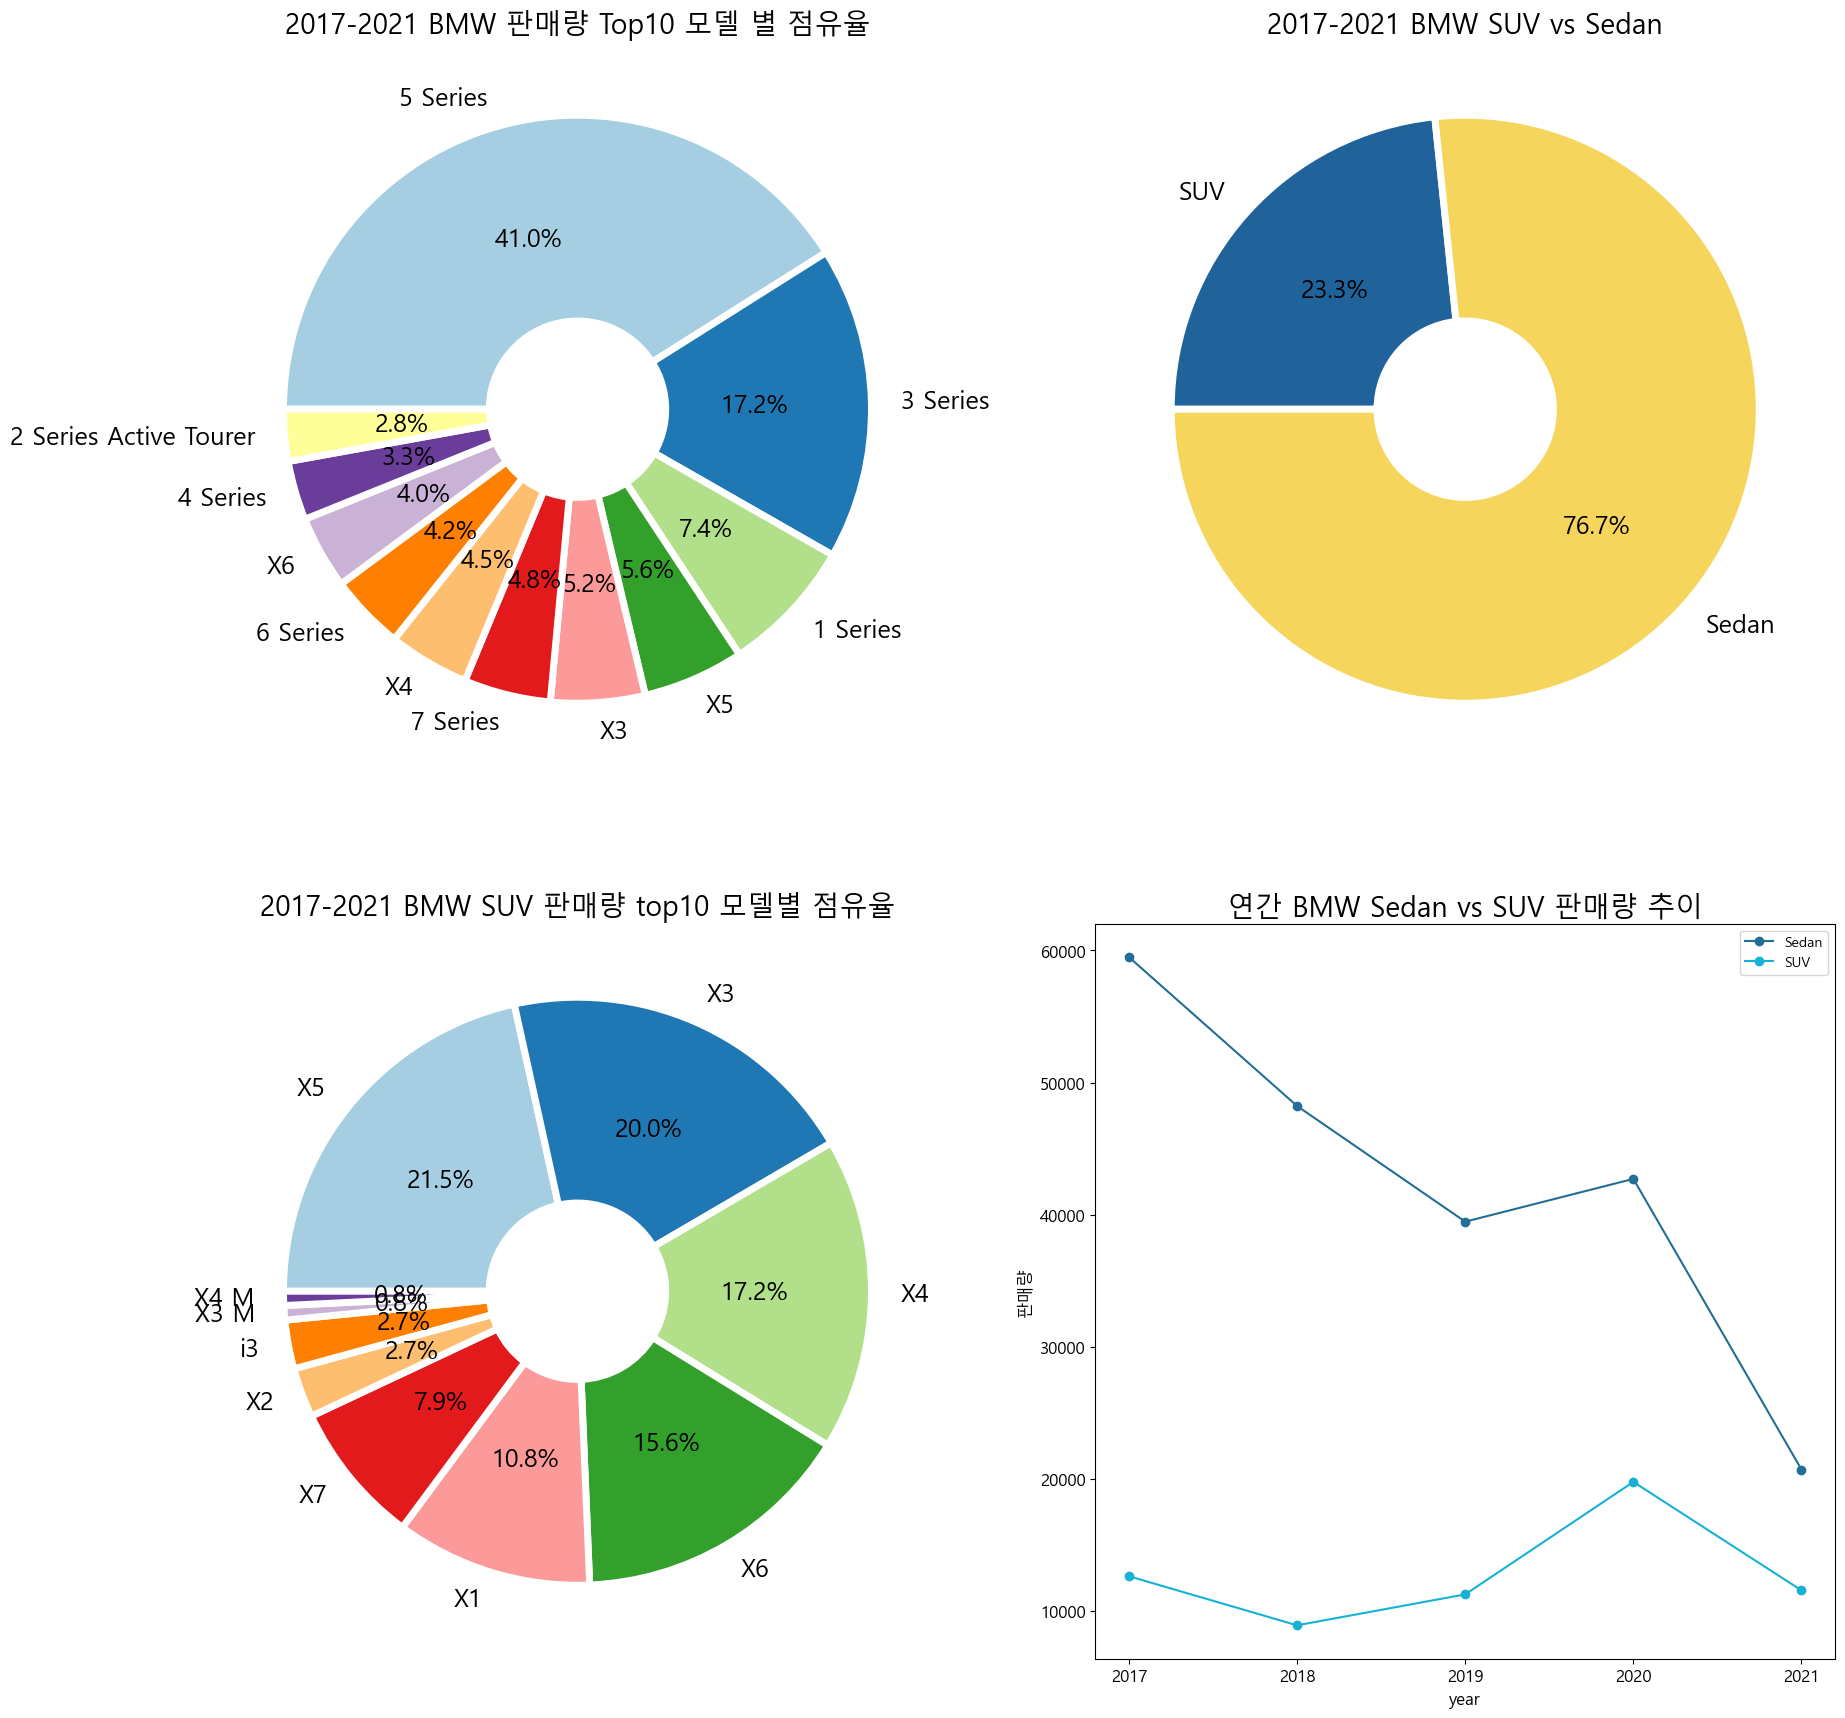

In [73]:
# 모델 별 점유율

#도표1
labels = ['5 Series','3 Series','1 Series','X5','X3','7 Series','X4','6 Series','X6','4 Series',
        '2 Series Active Tourer']

colors = custom_palette

plt.figure(figsize = (21,21))
plt.subplot(221)#프레임생성

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(BMWSalesRanking['판매량'][:11],#1%미만 절삭, 14개 모델
        labels=labels, autopct='%.1f%%', startangle=180,#시작점 
        counterclock=False, colors=colors, wedgeprops=wedgeprops,#시계방향, 색, wedgeprops
        textprops = {'fontsize':18})
# plt.legend(labels=labels, loc='upper right')#범례
plt.title("2017-2021 BMW 판매량 Top10 모델 별 점유율",size=20)

# 자간조정 필요


#도표2
labels2 = ['SUV','Sedan']
colors2 = ['#20639B','#F6D55C']

plt.subplot(222)#프레임생성

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(BMWModel['판매량'],
        labels=labels2, autopct='%.1f%%', startangle=180,#시작점 
        counterclock=False, colors=colors2, wedgeprops=wedgeprops,#시계방향, 색, wedgeprops
        textprops = {'fontsize':18})
# plt.legend(labels=labels, loc='upper right')#범례
plt.title("2017-2021 BMW SUV vs Sedan",size=20)


#도표3
labels3 = ['X5', 'X3', 'X4', 'X6', 'X1', 'X7', 'X2', 'i3', 'X3 M', 'X4 M']
colors2 = custom_palette2

plt.subplot(223)#프레임생성

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(BMWSuv['판매량'][:10],
        labels=labels3, autopct='%.1f%%', startangle=180,#시작점 
        counterclock=False, colors=colors2, wedgeprops=wedgeprops,#시계방향, 색, wedgeprops
        textprops = {'fontsize':18})
# plt.legend(labels=labels, loc='upper right')#범례
plt.title("2017-2021 BMW SUV 판매량 top10 모델별 점유율",size=20)


#도표4
ax = plt.subplot(224)#프레임생성

#꺾은선 그래프 추가

year = [2017, 2018, 2019, 2020, 2021]
index = np.arange(len(year))

ax.plot(index, BMWSuvSedanYear['BMW_Sedan'], label='Sedan', marker='o', color='#236E96') 
ax.plot(index, BMWSuvSedanYear['BMW_SUV'], label='SUV', marker='o', color='#15B2D3') 

ax.set_title('연간 BMW Sedan vs SUV 판매량 추이', fontsize=20) # 타이틀 설정
ax.set_ylabel('판매량', fontsize=12) # x축 설정
ax.set_xlabel('year', fontsize=12) # y축 설정

ax.legend(fontsize=10, loc='best') # 범례 설정 best로 해놓으면 가장 적절한 위치에 알아서 범례가 놓이게 됩니디


plt.xticks(index, year)
plt.show()

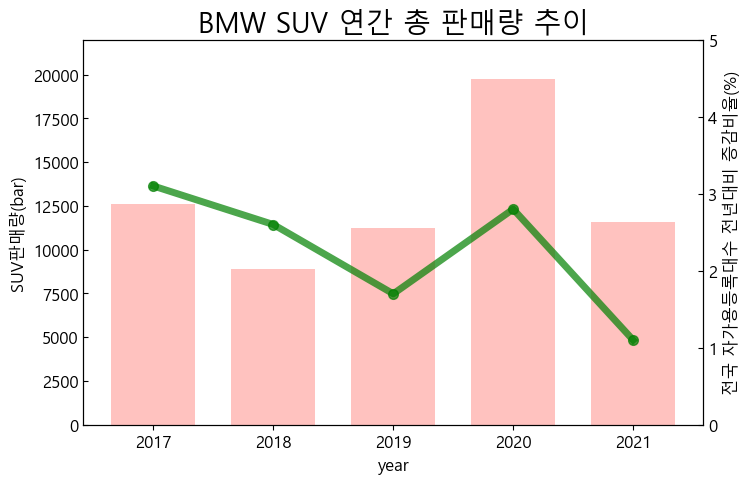

In [67]:

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'

# labels = [2017,2018,2019,2020,'2021(1~5월)']
# colors = custom_palette

x = np.arange(2017, 2022)
fig, ax1 = plt.subplots()


# SUV 모델 연간 총 판매량 추이

ax1.bar(x,BMWSuvYearQuentity2['quentity'], color='#FFA8A5', label='Demand', alpha=0.7, width=0.7)
ax1.set_ylim(0, 22000)
ax1.set_ylabel('SUV판매량(bar)')
ax1.set_xlabel('year')
ax1.tick_params(axis='y', direction='in')
plt.title('BMW SUV 연간 총 판매량 추이', size = 20)


#연도별 자동차 등록현황 자가용 총대수(화물, 특수, 이륜 제외)

ax2 = ax1.twinx()

ax2.plot(x, car_registration['자가용총대수'], marker = 'o', color='green', markersize=7, linewidth=5, alpha=0.7, label='Price')
ax2.set_ylim(0, 5)
ax2.set_xlabel('year')
ax2.set_ylabel('전국 자가용등록대수 전년대비 증감비율(%)')
ax2.tick_params(axis='both', direction='in')

plt.show()

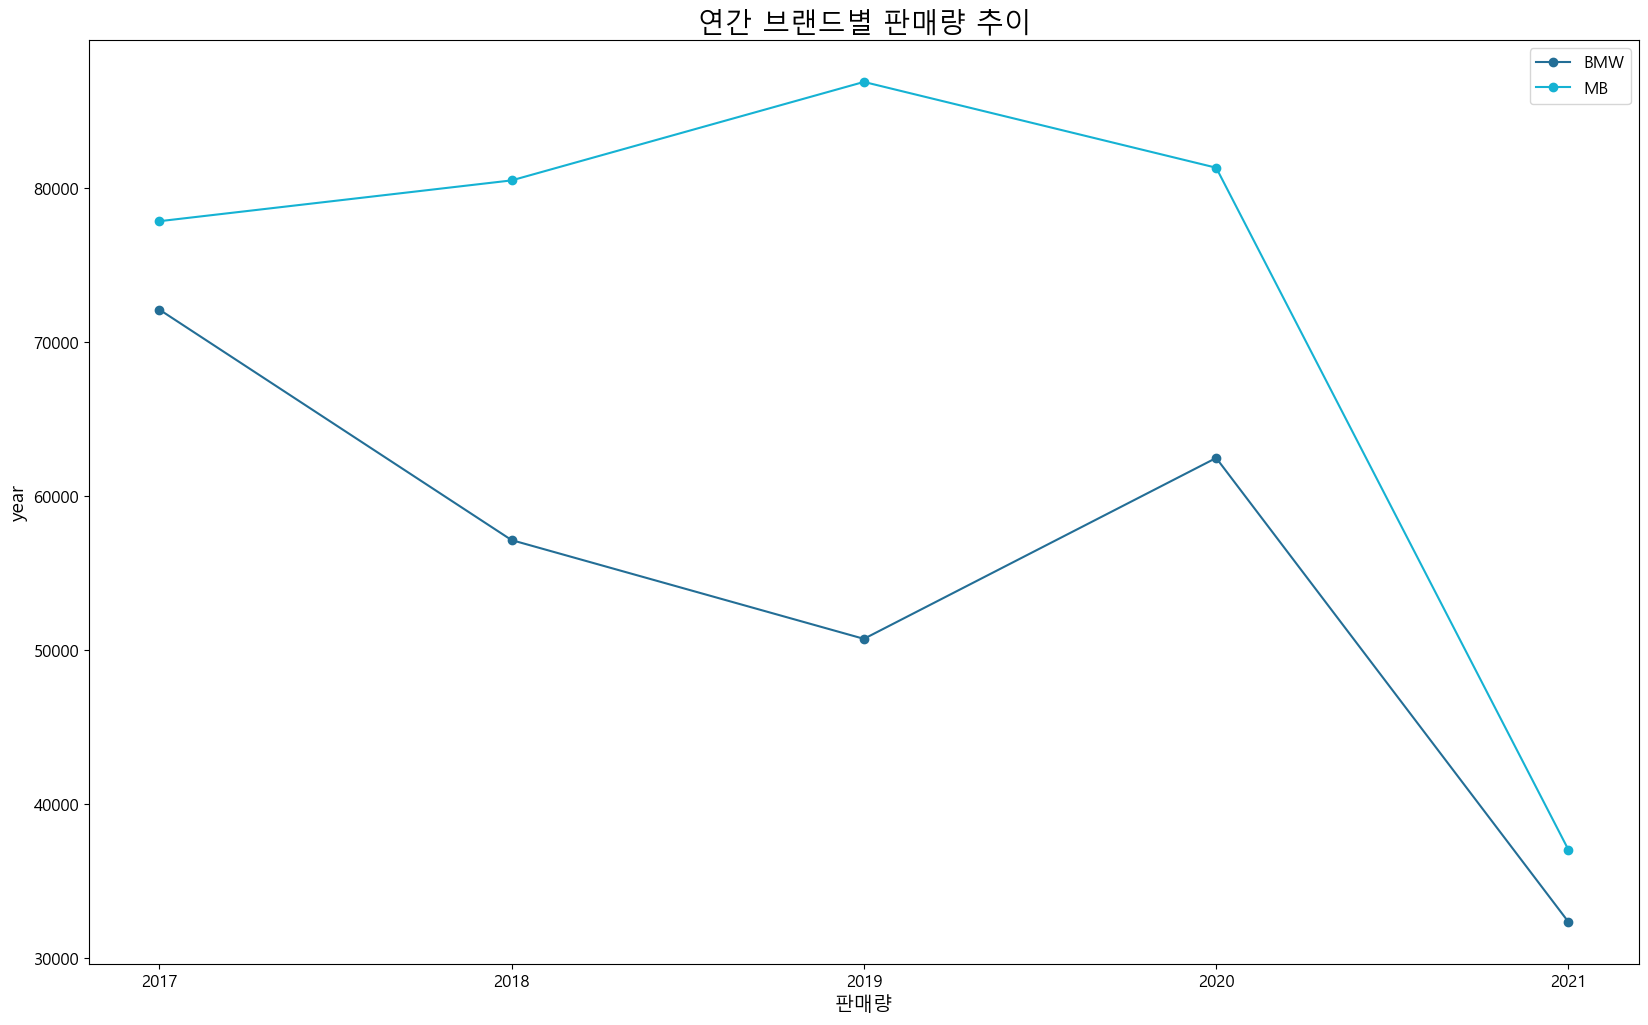

In [69]:
# 연간 브랜드별 판매량 꺾은 선 그래프 시각화

index = np.arange(len(year))
year = [2017, 2018, 2019, 2020, 2021]

# 차트 그리기
fig = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) # subplot 생성

ax.plot(index, BMW_quentity, label='BMW', marker='o', color='#236E96') 
ax.plot(index, MB_quentity, label='MB', marker='o', color='#15B2D3') 

ax.set_title('연간 브랜드별 판매량 추이', fontsize=20) # 타이틀 설정
ax.set_ylabel('year', fontsize=14) # x축 설정
ax.set_xlabel('판매량', fontsize=14) # y축 설정

ax.legend(fontsize=12, loc='best') # 범례 설정 best로 해놓으면 가장 적절한 위치에 알아서 범례가 놓이게 됩니디

plt.xticks(index, year)
plt.show()